<a href="https://colab.research.google.com/github/hongkwangpyo/2020_dip_learning/blob/master/0810_2_keras_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.utils import *
from collections import Counter

from sklearn.preprocessing import *

In [13]:
from keras.datasets import mnist

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

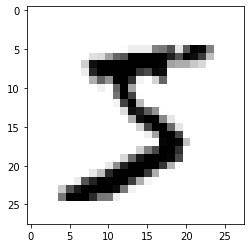

In [16]:
plt.imshow(x_train[0], cmap='binary')

# image data: (데이터의 수 , 가로픽셀, 세로픽셀, 칼러필터수(1:흑백, 3:칼라)) 

In [17]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convolution network 생성

In [30]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
________________________________________________

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') 

In [ ]:
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=200)

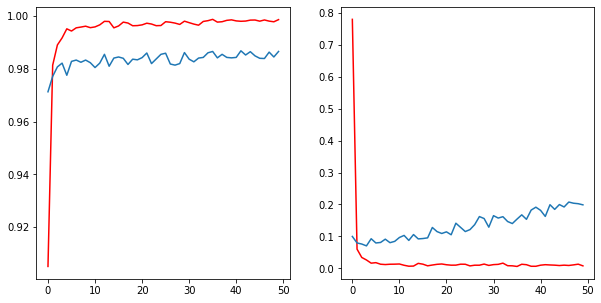

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r') 
plt.plot(hist.history['val_accuracy']) 
 
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r') 
plt.plot(hist.history['val_loss']) 

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1578 - accuracy: 0.9878


[0.15778671205043793, 0.9878000020980835]

In [42]:
l1 = model.get_layer('conv2d_6')
l1.get_weights()
l1.get_weights()[0][:,:,0,0]

array([[ 0.09956437,  0.02442813, -0.12781498, -0.10490856, -0.00223557],
       [-0.1136796 , -0.19863403, -0.10261281, -0.08475333,  0.01834969],
       [-0.06484316, -0.05598837,  0.10582781,  0.1102327 ,  0.00250468],
       [ 0.10891718,  0.05902862,  0.07543966, -0.08450142, -0.06007066],
       [-0.08087845,  0.01879278,  0.04570239, -0.00907515, -0.00925941]],
      dtype=float32)

In [43]:
l2 = model.get_layer('conv2d_7')
l2.get_weights()
l2.get_weights()[0][:,:,0,0]

array([[ 0.02734992, -0.07563278, -0.01435246, -0.14101148, -0.02183956],
       [-0.07160701, -0.03107058, -0.11375573, -0.06644601, -0.11968381],
       [ 0.08704074, -0.015934  ,  0.07393346, -0.03248135, -0.142058  ],
       [-0.17912312, -0.11598752, -0.05052105,  0.03900364, -0.01236698],
       [ 0.07121497,  0.10192629, -0.17040358, -0.12889567, -0.10068846]],
      dtype=float32)

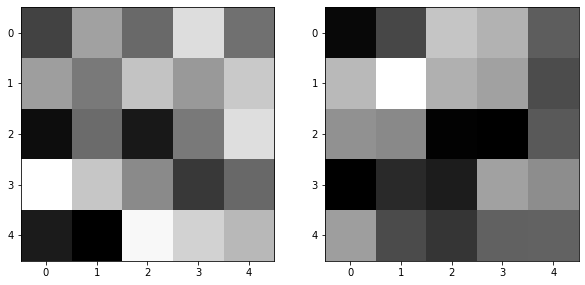

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(l2.get_weights()[0][:,:,0,0], cmap='binary')
plt.subplot(1,2,2)
plt.imshow(l1.get_weights()[0][:,:,0,0], cmap='binary')